In [5]:
import requests
import pandas as pd
import seaborn as sns

In [30]:
url = 'https://api.nal.usda.gov/fdc/v1/foods/list?&pageSize=194&pageNumber=51&api_key=DLKMiNZ1JdqunkajetLlxzCgEVaE1P3FPvKwzz8f'

In [31]:
 response = requests.get(url)
 response = response.json()
 response

{'error': {'code': 'OVER_RATE_LIMIT',
  'message': 'You have exceeded your rate limit. Try again later or contact us at https://api.nal.usda.gov:443/contact/ for assistance'}}

In [22]:
def requestAllFood():
    pageNum = 1
    foods = []
    while True:
        url = 'https://api.nal.usda.gov/fdc/v1/foods/list?&api_key=DLKMiNZ1JdqunkajetLlxzCgEVaE1P3FPvKwzz8f&pageSize=200&pageNumber=' + str(pageNum)
        req = requests.get(url)
        if not req.ok:
            break
        foods = foods + req.json()
        pageNum = pageNum + 1
    
    return foods

In [23]:
listOfFoods = requestAllFood()

In [24]:
print(listOfFoods[6])

IndexError: list index out of range

In [25]:
def getIron():
    iron = []
    for food in listOfFoods:
        name = food['description']
        for nutrient in food['foodNutrients']:
            if nutrient['name'] == 'Iron, Fe':
                amount = nutrient['amount']
                temp = {'Name': name, 'Iron': amount}
                iron.append(temp)
    return iron

In [26]:
data = getIron()


In [27]:
df = pd.DataFrame(data)

In [28]:
df.head()

""


In [29]:
top = df.sort_values(by="Iron", ascending=False)

KeyError: 'Iron'

In [ ]:
top10 = top[:10]

In [ ]:
top10.head()

<AxesSubplot:xlabel='Iron', ylabel='Name'>

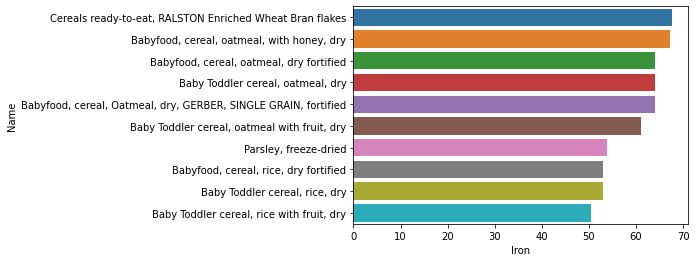

In [30]:
sns.barplot(data=top10, x="Iron", y="Name")